# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -1.357825
c    0.941481
d    1.398526
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.346795
2018-11-20 14:45:00     9.760000
2018-11-21 14:45:00     9.525920
2018-11-22 14:45:00     9.494854
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.346795
2018-11-20 14:45:00     9.760000
2018-11-21 14:45:00     9.525920
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,-1.980641,0.661310,0.867598,-2.394132
2018-11-19 15:45:00,-0.482450,-0.165570,0.361905,-0.691299
2018-11-19 16:45:00,-0.036608,-0.854954,1.741488,1.067516
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,-0.789056
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,1.478171
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,1.269355
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,-1.096991
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,-0.449281
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,-0.663982
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,-0.587082


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-1.980641,0.661310,0.867598,-2.394132
2018-11-19 15:45:00,-0.482450,-0.165570,0.361905,-0.691299
2018-11-19 16:45:00,-0.036608,-0.854954,1.741488,1.067516
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,-0.789056
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,1.478171


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,-1.096991
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,-0.449281
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,-0.663982
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,-0.587082


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-1.98064147,  0.66130991,  0.86759805, -2.39413231],
       [-0.48245048, -0.16556972,  0.36190474, -0.69129915],
       [-0.03660802, -0.85495384,  1.74148777,  1.06751635],
       [-1.50095417, -0.20422982, -0.34550358, -0.78905603],
       [-0.29004102,  1.80473189,  1.36660767,  1.47817089],
       [-0.87351855,  1.28121417, -0.21817708,  1.26935525],
       [ 0.56246694,  0.4724072 , -0.55343283, -1.09699102],
       [ 1.40841864,  0.44691583, -0.00688567, -0.44928092],
       [-0.88712845,  0.12597483, -0.41986353, -0.66398176],
       [ 0.74742206, -0.1362242 , -0.73026119, -0.5870822 ]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.333303,0.343158,0.206347,-0.285678
std,1.043062,0.775724,0.852524,1.208437
min,-1.980641,-0.854954,-0.730261,-2.394132
25%,-0.883726,-0.158233,-0.401274,-0.764617
50%,-0.386246,0.286445,-0.112531,-0.625532
75%,0.412698,0.614084,0.741175,0.688317
max,1.408419,1.804732,1.741488,1.478171


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-1.980641,-0.482450,-0.036608,-1.500954,-0.290041,-0.873519,0.562467,1.408419,-0.887128,0.747422
B,0.661310,-0.165570,-0.854954,-0.204230,1.804732,1.281214,0.472407,0.446916,0.125975,-0.136224
C,0.867598,0.361905,1.741488,-0.345504,1.366608,-0.218177,-0.553433,-0.006886,-0.419864,-0.730261
D,-2.394132,-0.691299,1.067516,-0.789056,1.478171,1.269355,-1.096991,-0.449281,-0.663982,-0.587082


In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,-2.394132,0.867598,0.661310,-1.980641
2018-11-19 15:45:00,-0.691299,0.361905,-0.165570,-0.482450
2018-11-19 16:45:00,1.067516,1.741488,-0.854954,-0.036608
2018-11-19 17:45:00,-0.789056,-0.345504,-0.204230,-1.500954
2018-11-19 18:45:00,1.478171,1.366608,1.804732,-0.290041
2018-11-19 19:45:00,1.269355,-0.218177,1.281214,-0.873519
2018-11-19 20:45:00,-1.096991,-0.553433,0.472407,0.562467
2018-11-19 21:45:00,-0.449281,-0.006886,0.446916,1.408419
2018-11-19 22:45:00,-0.663982,-0.419864,0.125975,-0.887128
2018-11-19 23:45:00,-0.587082,-0.730261,-0.136224,0.747422


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,-0.587082
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,-1.096991
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,-0.663982
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,-0.789056
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,1.269355
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,-0.449281
2018-11-19 15:45:00,-0.482450,-0.165570,0.361905,-0.691299
2018-11-19 14:45:00,-1.980641,0.661310,0.867598,-2.394132
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,1.478171
2018-11-19 16:45:00,-0.036608,-0.854954,1.741488,1.067516


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -1.980641
2018-11-19 15:45:00   -0.482450
2018-11-19 16:45:00   -0.036608
2018-11-19 17:45:00   -1.500954
2018-11-19 18:45:00   -0.290041
2018-11-19 19:45:00   -0.873519
2018-11-19 20:45:00    0.562467
2018-11-19 21:45:00    1.408419
2018-11-19 22:45:00   -0.887128
2018-11-19 23:45:00    0.747422
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -1.980641
2018-11-19 15:45:00   -0.482450
2018-11-19 16:45:00   -0.036608
2018-11-19 17:45:00   -1.500954
2018-11-19 18:45:00   -0.290041
2018-11-19 19:45:00   -0.873519
2018-11-19 20:45:00    0.562467
2018-11-19 21:45:00    1.408419
2018-11-19 22:45:00   -0.887128
2018-11-19 23:45:00    0.747422
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -1.980641  0.661310  0.867598 -2.394132
2018-11-19 15:45:00 -0.482450 -0.165570  0.361905 -0.691299
2018-11-19 16:45:00 -0.036608 -0.854954  1.741488  1.067516
                            A         B         C         D
2018-11-19 14:45:00 -1.980641  0.661310  0.867598 -2.394132
2018-11-19 15:45:00 -0.482450 -0.165570  0.361905 -0.691299
2018-11-19 16:45:00 -0.036608 -0.854954  1.741488  1.067516


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.980641
B    0.661310
C    0.867598
D   -2.394132
Name: 2018-11-19 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,-1.980641,0.661310
2018-11-19 15:45:00,-0.482450,-0.165570
2018-11-19 16:45:00,-0.036608,-0.854954
2018-11-19 17:45:00,-1.500954,-0.204230
2018-11-19 18:45:00,-0.290041,1.804732
2018-11-19 19:45:00,-0.873519,1.281214
2018-11-19 20:45:00,0.562467,0.472407
2018-11-19 21:45:00,1.408419,0.446916
2018-11-19 22:45:00,-0.887128,0.125975
2018-11-19 23:45:00,0.747422,-0.136224


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-0.290041,1.804732
2018-11-19 19:45:00,-0.873519,1.281214
2018-11-19 20:45:00,0.562467,0.472407


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.4824504843767834
-0.4824504843767834


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -1.500954
B   -0.204230
C   -0.345504
D   -0.789056
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -1.500954 -0.204230
2018-11-19 18:45:00 -0.290041  1.804732


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.482450,0.361905
2018-11-19 16:45:00,-0.036608,1.741488
2018-11-19 18:45:00,-0.290041,1.366608


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00 -0.482450 -0.165570  0.361905 -0.691299
2018-11-19 16:45:00 -0.036608 -0.854954  1.741488  1.067516 

                            B         C
2018-11-19 14:45:00  0.661310  0.867598
2018-11-19 15:45:00 -0.165570  0.361905
2018-11-19 16:45:00 -0.854954  1.741488
2018-11-19 17:45:00 -0.204230 -0.345504
2018-11-19 18:45:00  1.804732  1.366608
2018-11-19 19:45:00  1.281214 -0.218177
2018-11-19 20:45:00  0.472407 -0.553433
2018-11-19 21:45:00  0.446916 -0.006886
2018-11-19 22:45:00  0.125975 -0.419864
2018-11-19 23:45:00 -0.136224 -0.730261


In [31]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.16556971521347913

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 14:45:00,-1.980641,0.661310,0.867598,-2.394132
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,1.478171
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,1.269355
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,-1.096991
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,-0.449281
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,-0.663982


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,0.661310,0.867598,NaN
2018-11-19 15:45:00,NaN,NaN,0.361905,NaN
2018-11-19 16:45:00,NaN,NaN,1.741488,1.067516
2018-11-19 17:45:00,NaN,NaN,NaN,NaN
2018-11-19 18:45:00,NaN,1.804732,1.366608,1.478171
2018-11-19 19:45:00,NaN,1.281214,NaN,1.269355
2018-11-19 20:45:00,0.562467,0.472407,NaN,NaN
2018-11-19 21:45:00,1.408419,0.446916,NaN,NaN
2018-11-19 22:45:00,NaN,0.125975,NaN,NaN
2018-11-19 23:45:00,0.747422,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.661310,0.867598,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.482450,-0.165570,0.361905,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.036608,-0.854954,1.741488,5,1.0,4,0.999848
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,5,2.5,10,0.999048
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,5,3.0,12,0.998630
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,5,4.0,16,0.997564
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.661310,-0.867598,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.482450,-0.165570,-0.361905,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.036608,-0.854954,-1.741488,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.290041,-1.804732,-1.366608,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.873519,-1.281214,-0.218177,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.562467,-0.472407,-0.553433,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.408419,-0.446916,-0.006886,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.887128,-0.125975,-0.419864,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.747422,-0.136224,-0.730261,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

# which is equivalent to
# df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,0.661310,0.867598,5,0.0,1.000000
2018-11-19 15:45:00,-0.482450,-0.165570,0.361905,5,0.5,0.999962
2018-11-19 16:45:00,-0.036608,-0.854954,1.741488,5,1.0,0.999848
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,5,1.5,0.999657
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,5,2.0,0.999391
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,5,2.5,0.999048
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,5,3.0,0.998630
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,5,3.5,0.998135
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,5,4.0,0.997564
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,5,4.5,0.996917


In [38]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.661310,0.867598,5,0.0,0,1.000000
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,5,2.5,10,0.999048
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,5,3.0,12,0.998630
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.887128,0.125975,-0.419864,5,4.0,16,0.997564
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,5,4.5,18,0.996917


In [39]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.661310,0.867598,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.482450,-0.165570,0.361905,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.036608,-0.854954,1.741488,5,1.0,4,0.999848
2018-11-19 17:45:00,-1.500954,-0.204230,-0.345504,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.290041,1.804732,1.366608,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.873519,1.281214,-0.218177,5,2.5,10,0.999048
2018-11-19 20:45:00,0.562467,0.472407,-0.553433,5,3.0,12,0.998630
2018-11-19 21:45:00,1.408419,0.446916,-0.006886,5,3.5,14,0.998135
2018-11-19 23:45:00,0.747422,-0.136224,-0.730261,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [40]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.661310,0.867598,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,NaN,0.361905,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,NaN,1.741488,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,1.804732,1.366608,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,1.281214,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.562467,0.472407,NaN,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.408419,0.446916,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,0.125975,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.747422,NaN,NaN,5,4.5,18.0,0.996917


In [41]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [42]:
# getting a mask
df_wNan.isna()
# df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,True,False,False,False,True,True,False
2018-11-19 15:45:00,True,True,False,False,False,False,False
2018-11-19 16:45:00,True,True,False,False,False,False,False
2018-11-19 17:45:00,True,True,True,False,False,False,False
2018-11-19 18:45:00,True,False,False,False,False,False,False
2018-11-19 19:45:00,True,False,True,False,False,False,False
2018-11-19 20:45:00,False,False,True,False,False,False,False
2018-11-19 21:45:00,False,False,True,False,False,False,False
2018-11-19 22:45:00,True,False,True,False,False,False,False
2018-11-19 23:45:00,False,True,True,False,False,False,False


In [43]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.661310,0.867598,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.000000,0.000000,0.361905,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.000000,0.000000,1.741488,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.000000,1.804732,1.366608,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.000000,1.281214,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.562467,0.472407,0.000000,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.408419,0.446916,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.000000,0.125975,0.000000,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.747422,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [44]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.661310,0.867598,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.661310,0.361905,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,0.661310,1.741488,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,0.661310,1.741488,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,1.804732,1.366608,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,1.281214,1.366608,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.562467,0.472407,1.366608,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.408419,0.446916,1.366608,5,3.5,14.0,0.998135
2018-11-19 22:45:00,1.408419,0.125975,1.366608,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.747422,0.125975,1.366608,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [45]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.135239
B          0.343158
C          0.206347
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    1.075558
2018-11-19 15:45:00    1.173407
2018-11-19 16:45:00    1.692825
2018-11-19 17:45:00    1.635567
2018-11-19 18:45:00    2.697241
2018-11-19 19:45:00    2.669795
2018-11-19 20:45:00    3.068582
2018-11-19 21:45:00    3.620941
2018-11-19 22:45:00    3.545221
2018-11-19 23:45:00    4.053979
Freq: H, dtype: float64 



In [46]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.661310,0.867598,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.482450,0.495740,1.229503,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.519059,-0.359214,2.970991,15,1.5,6,2.999810
2018-11-19 17:45:00,-2.020013,-0.563443,2.625487,20,3.0,12,3.999467
2018-11-19 18:45:00,-2.310054,1.241288,3.992095,25,5.0,20,4.998858
2018-11-19 19:45:00,-3.183572,2.522503,3.773918,30,7.5,30,5.997906
2018-11-19 20:45:00,-2.621105,2.994910,3.220485,35,10.5,42,6.996536
2018-11-19 21:45:00,-1.212687,3.441826,3.213599,40,14.0,56,7.994670
2018-11-19 22:45:00,-2.099815,3.567800,2.793736,45,18.0,72,8.992234
2018-11-19 23:45:00,-1.352393,3.431576,2.063474,50,22.5,90,9.989152


In [47]:
df.apply(lambda x: x.max() - x.min())

A           2.909373
B           2.659686
C           2.471749
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00    0.661310
2018-11-19 15:45:00   -0.648020
2018-11-19 16:45:00   -0.891562
2018-11-19 17:45:00   -1.705184
2018-11-19 18:45:00    1.514691
2018-11-19 19:45:00    0.407696
2018-11-19 20:45:00    1.034874
2018-11-19 21:45:00    1.855334
2018-11-19 22:45:00   -0.761154
2018-11-19 23:45:00    0.611198
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
file_name="~/data/data_000636.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,60,3869187117,788,15
1,1,0,63,3869187117,787,23
2,1,0,64,3869187117,786,12
3,1,1,1,3869187117,1078,14
4,1,0,27,3869187117,1080,9
5,1,0,49,3869187117,1077,3
6,1,1,11,3869187117,1078,19
7,1,0,139,3869187117,1083,0
8,1,0,32,3869187117,1081,27
9,1,0,50,3869187117,1078,24


Let's know do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [115]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.448704,-1.313381,-1.186456,-1.002221
1,-0.593796,-0.761095,-0.693371,-1.010814
2,-0.846044,0.604343,0.207266,-1.512023
3,-0.113708,-0.633650,-1.381320,2.798830
4,-1.148068,-2.632006,-1.818179,0.114556
5,2.166299,-1.828775,-1.119964,0.982303
6,2.806240,0.511193,0.123695,-0.928094
7,-0.574609,0.930803,-1.181679,0.475534
8,-0.765798,-0.315291,0.464204,1.251668
9,0.161324,-0.326116,-0.978550,-0.142702


In [116]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.448704 -1.313381 -1.186456 -1.002221
 1 -0.593796 -0.761095 -0.693371 -1.010814
 2 -0.846044  0.604343  0.207266 -1.512023,
           0         1         2         3
 3 -0.113708 -0.633650 -1.381320  2.798830
 4 -1.148068 -2.632006 -1.818179  0.114556
 5  2.166299 -1.828775 -1.119964  0.982303
 6  2.806240  0.511193  0.123695 -0.928094,
           0         1         2         3
 7 -0.574609  0.930803 -1.181679  0.475534
 8 -0.765798 -0.315291  0.464204  1.251668
 9  0.161324 -0.326116 -0.978550 -0.142702]

In [117]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.448704,-1.313381,-1.186456,-1.002221
1,-0.593796,-0.761095,-0.693371,-1.010814
2,-0.846044,0.604343,0.207266,-1.512023
3,-0.113708,-0.633650,-1.381320,2.798830
4,-1.148068,-2.632006,-1.818179,0.114556
5,2.166299,-1.828775,-1.119964,0.982303
6,2.806240,0.511193,0.123695,-0.928094
7,-0.574609,0.930803,-1.181679,0.475534
8,-0.765798,-0.315291,0.464204,1.251668
9,0.161324,-0.326116,-0.978550,-0.142702


In [118]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,-0.448704,-1.313381,-1.186456,-1.002221
1,-0.593796,-0.761095,-0.693371,-1.010814
2,-0.846044,0.604343,0.207266,-1.512023
3,-0.113708,-0.633650,-1.381320,2.798830
4,-1.148068,-2.632006,-1.818179,0.114556
5,2.166299,-1.828775,-1.119964,0.982303
6,2.806240,0.511193,0.123695,-0.928094
7,-0.574609,0.930803,-1.181679,0.475534
8,-0.765798,-0.315291,0.464204,1.251668
9,0.161324,-0.326116,-0.978550,-0.142702


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [119]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [120]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.489639,0.924518
1,bar,one,0.450007,-2.096548
2,foo,two,1.328950,-0.561590
3,bar,three,-0.869449,0.616798
4,foo,two,-0.439870,-1.818735
5,bar,two,0.775923,1.623252
6,foo,one,-1.434407,0.075231
7,foo,three,0.523392,-0.374257


In [121]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.356480,0.143503
foo,-0.511575,-1.754832


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [123]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one       0.138628
       two       0.253833
baz    one      -0.381235
       two      -1.167083
foo    one       0.992080
       two      -0.023856
qux    one       0.173766
       two      -1.488420
dtype: float64


In [124]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.450007 -2.096548
    three -0.869449  0.616798
    two    0.775923  1.623252
foo one   -1.924046  0.999749
    three  0.523392 -0.374257
    two    0.889079 -2.380324

In [125]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.450007
            D   -2.096548
     three  C   -0.869449
            D    0.616798
     two    C    0.775923
            D    1.623252
foo  one    C   -1.924046
            D    0.999749
     three  C    0.523392
            D   -0.374257
     two    C    0.889079
            D   -2.380324
dtype: float64

## Plotting

Just a preview, more on the next lab class!

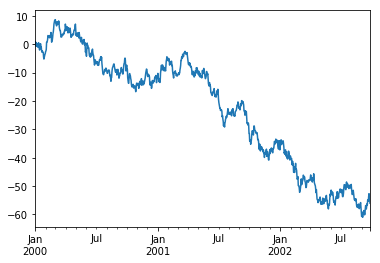

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline 
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

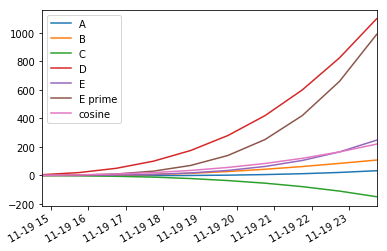

In [131]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')